# Data loader demo

In [1]:
import task3.utils.config
import task3.utils.utils
import task3.utils.img_utils
import importlib
import sys

## Initialize setup and get the data loader

In [2]:
importlib.reload(sys.modules['task3.utils.config'])
importlib.reload(sys.modules['task3.utils.utils'])
from task3.utils.config import get_data_loader
from task3.utils.utils import init

cfg = init(config='configs/default.yaml')

# you'd probably call this in train.py
training_loader, validation_loader, test_loader = get_data_loader(cfg, mode='train', get_subset=False)
submission_loader = get_data_loader(cfg, mode='submission', get_subset=False)

## Visualize data

In [3]:
# Get and visualize a batch of training data
train_batch = next(iter(training_loader))
val_batch = next(iter(validation_loader))
test_batch = next(iter(test_loader))
submission_batch = next(iter(submission_loader))

batches = {
    'train': train_batch,
    'val': val_batch,
    'test': test_batch,
    'submission': submission_batch,
}

train batch keys: dict_keys(['id', 'frame_cropped', 'dataset', 'label_cropped'])


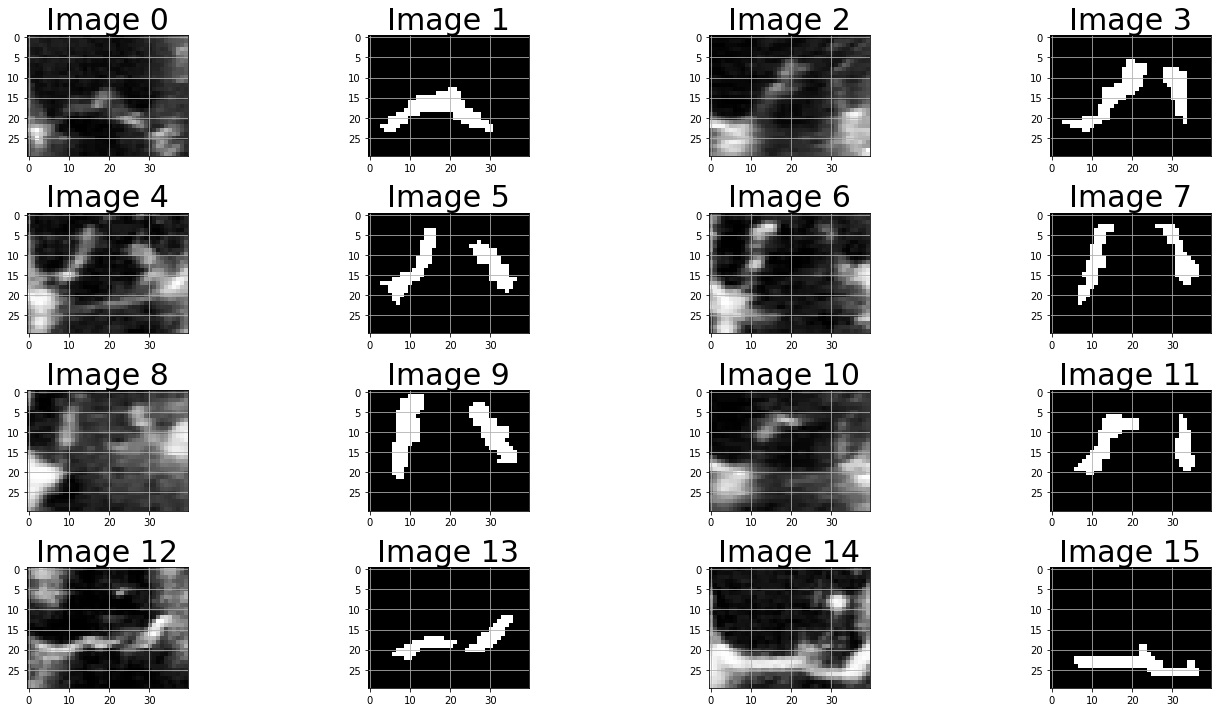

val batch keys: dict_keys(['id', 'frame_cropped', 'dataset', 'label_cropped'])


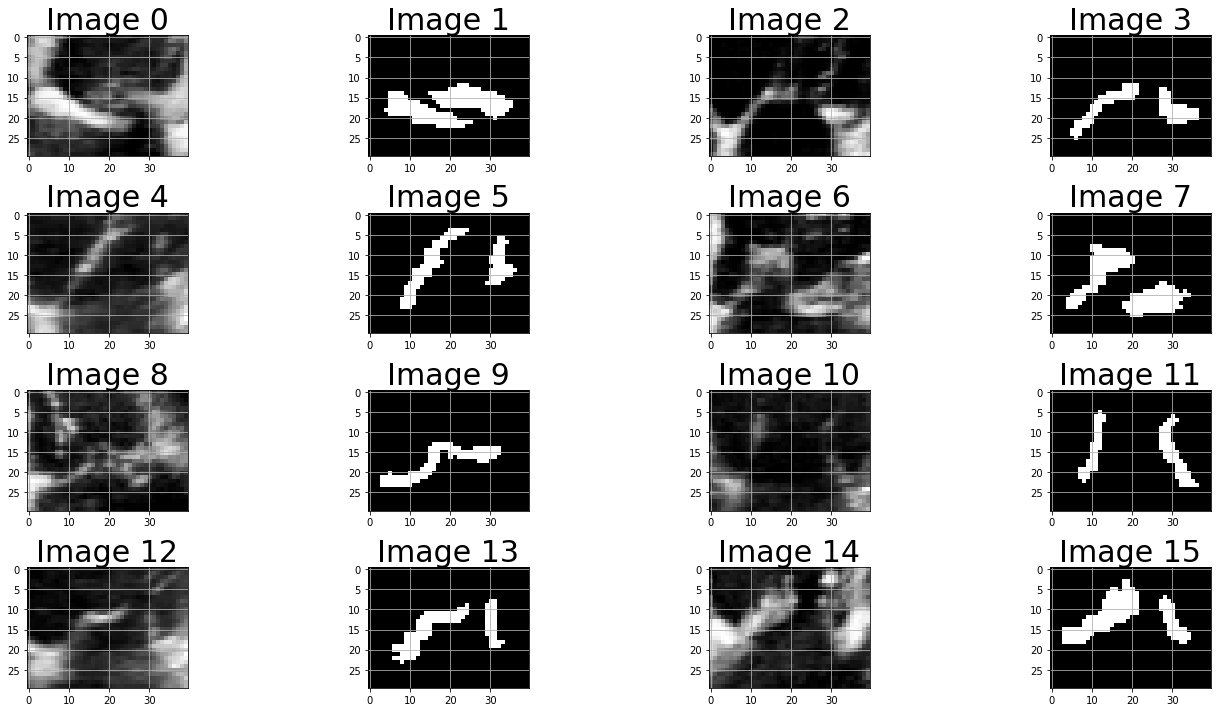

test batch keys: dict_keys(['id', 'frame_cropped', 'dataset', 'label_cropped'])


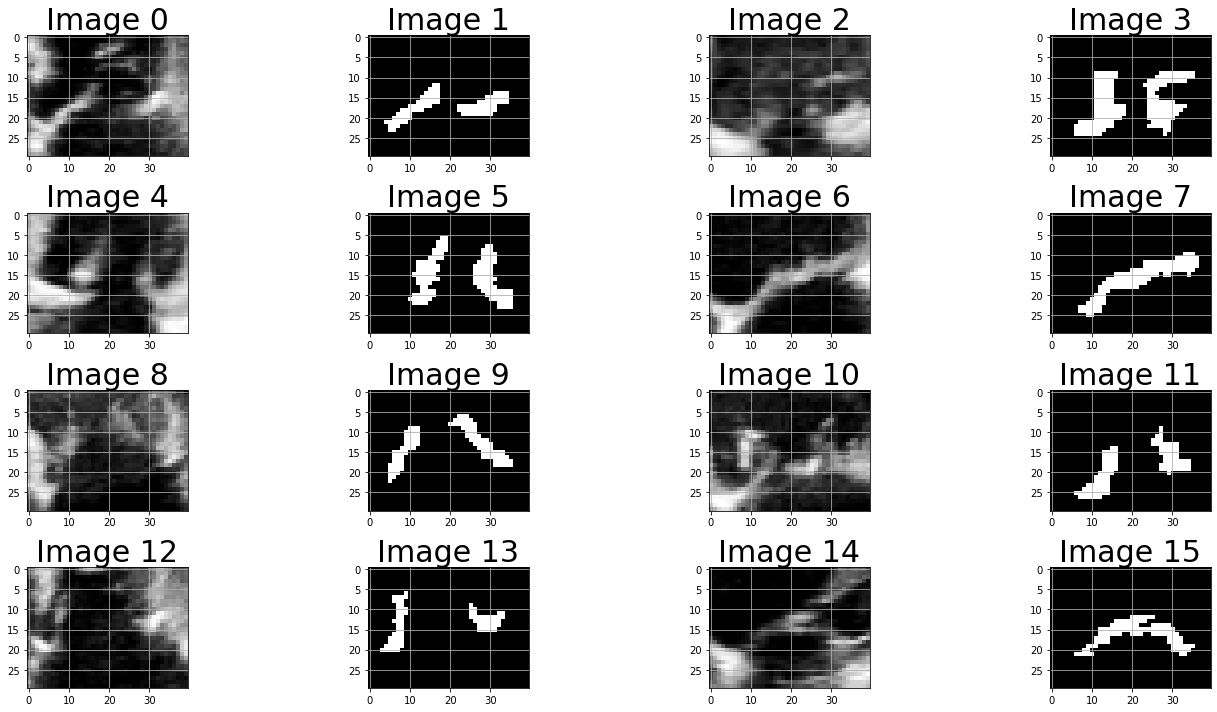

submission batch keys: dict_keys(['id', 'frame_cropped'])


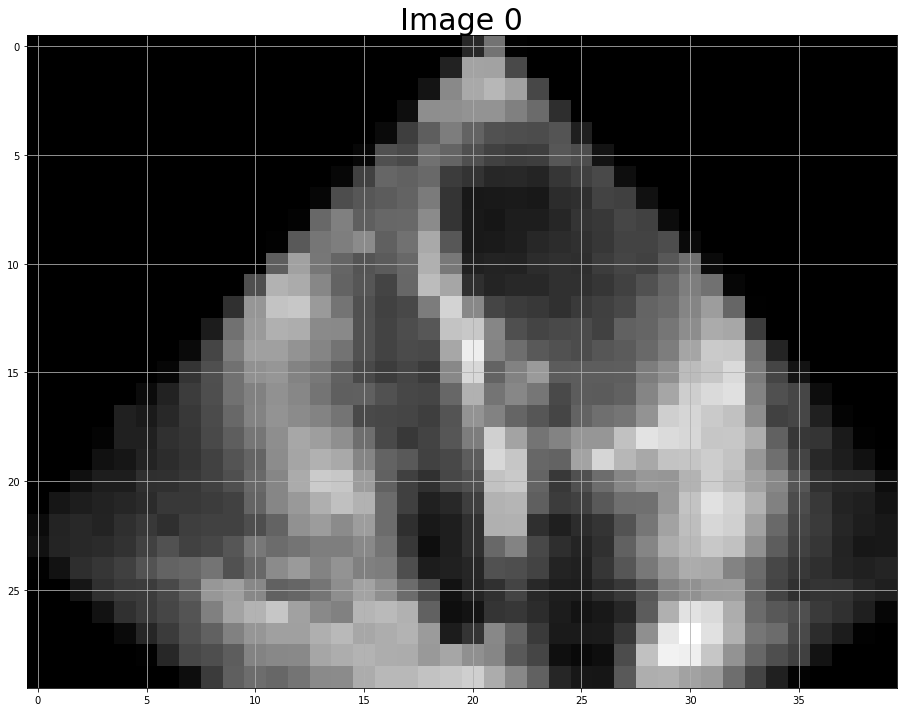

In [4]:
importlib.reload(sys.modules['task3.utils.img_utils'])
from task3.utils.img_utils import show_img_batch

for name, batch in batches.items():
    print('{} batch keys:'.format(name), batch.keys())
    show_img_batch(batch)